In [74]:
%cd /content/drive/MyDrive/Capstone9

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Capstone9'
c:\Users\Ahsan\Downloads


## My Capstone Project- Assignment 9
- Car Price Predicition
- Uses a Kaggle Database


In [75]:
!ls /content/drive/MyDrive/Capstone9/CarData.csv



'ls' is not recognized as an internal or external command,
operable program or batch file.


In [76]:
import warnings
warnings.filterwarnings('ignore')

## Step 1: Readind Dataset

In [77]:
# Reading the dataset
import pandas as pd
import numpy as np

CarData = pd.read_csv(r'C:\Users\Ahsan\OneDrive\Desktop\Assignement 9\CarData.csv', encoding='latin1')
print('Shape before deleting duplicate values:', CarData.shape)

# Removing duplicate rows
CarData=CarData.drop_duplicates()

print('Shape after deleting duplicate values:', CarData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CarData.head(10)


Shape before deleting duplicate values: (6019, 14)
Shape after deleting duplicate values: (6019, 14)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


## Step 2: Problem Statement Definition
- Creating a pridiction model to predict Price of car
-Target Variable:Name	Location	Year	Kilometers_Driven	Fuel_Type	Transmission	Owner_Type	Mileage	Engine	Power	Seats	New_Price etc

## Step 3:Random Forest Regressor

# Step 4: Looking at the class distribution, Target variable distribution to check if the data is balanced or skewed.

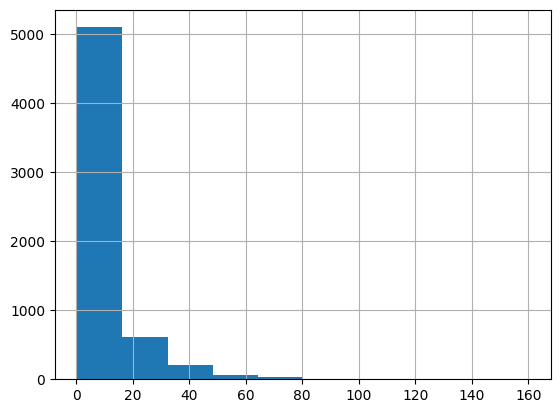

In [78]:

%matplotlib inline

# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the target variable values

CarData['Price'].hist()
CarData['Price'] = np.log(CarData['Price'])



 ## Step 5: Basic Exploratory Data Analysis



In [79]:
# Sample data for first 5 rows
CarData.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,0.559616
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,2.525729
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,1.504077
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,1.791759
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,2.875822


In [80]:
# Sample Data for bottom 5 rows
CarData.tail()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,1.558145
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,1.386294
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,1.064711
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,0.974560
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,0.916291


In [81]:
# Summarized Information
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [82]:
# Descriptive statistics of data
CarData.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,1.825095
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,0.874059
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-0.820981
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.252763
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.729884
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,2.297573


In [83]:
CarData.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,1.825095
std,1737.679967,3.269742,9.126884e+04,0.808840,0.874059
min,0.000000,1998.000000,1.710000e+02,0.000000,-0.820981
25%,1504.500000,2011.000000,3.400000e+04,5.000000,1.252763
50%,3009.000000,2014.000000,5.300000e+04,5.000000,1.729884
75%,4513.500000,2016.000000,7.300000e+04,5.000000,2.297573
max,6018.000000,2019.000000,6.500000e+06,10.000000,5.075174


In [84]:

CarData.nunique()
# Location , Fuel_Type ,Seats , Owner_Type , Transmission , Year

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

## Step 6 Removing Unwanted Columns
- Removing Un-named column as its just Numbering of column

In [85]:
# Removing the 'Unnamed: 0' column because it does not has any purpose in data
CarData = CarData.drop('Unnamed: 0', axis=1)

## Step:7 Visual Exploratory Data Analysis

In [86]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

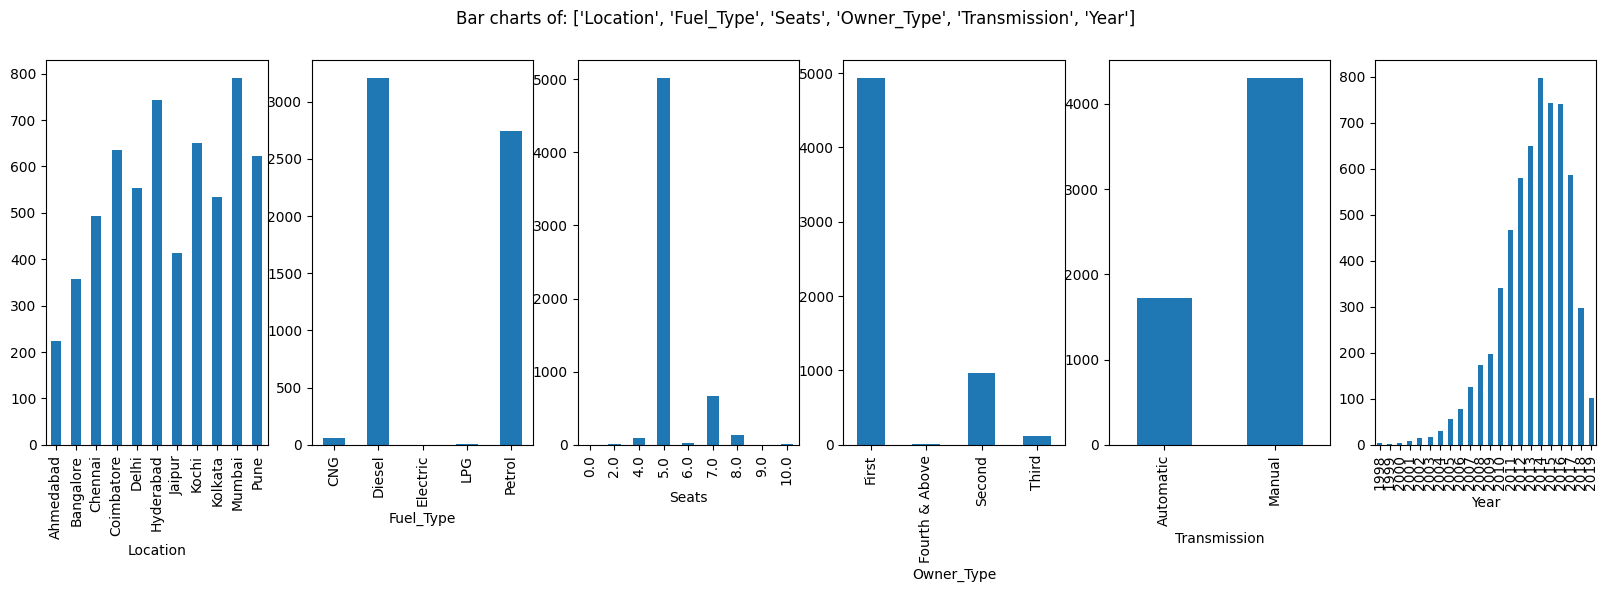

In [87]:
####################################################################
PlotBarCharts(inpData=CarData, colsToPlot=['Location','Fuel_Type','Seats' ,'Owner_Type' ,'Transmission' , 'Year'])

array([[<Axes: title={'center': 'Kilometers_Driven'}>]], dtype=object)

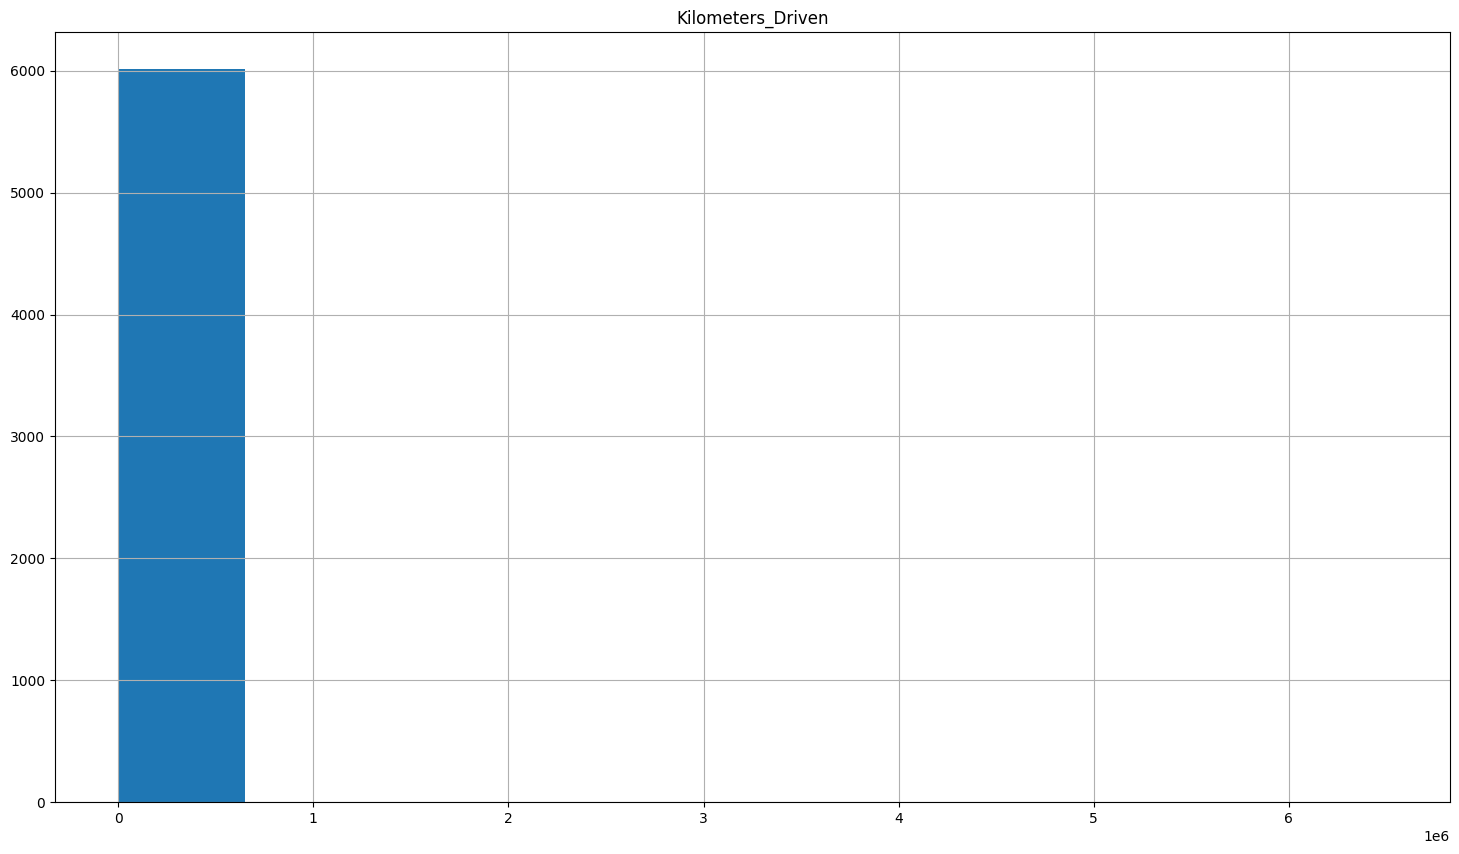

In [88]:
# Plotting histograms of multiple columns together
CarData.hist(['Kilometers_Driven','Mileage','Engine','Power' ,'New_Price',], figsize=(18,10))

## Step: 8 Feature Selection Based on Data distribution
Mileage , Engine , Power , Engine , Year

## Step 9: Outliers Approach

In [89]:
#Replacing outliers for 'Kilometers_Driven'
# Finding nearest values to 60 mark
CarData['Kilometers_Driven'][CarData['Kilometers_Driven']<60].sort_values(ascending=False)

Series([], Name: Kilometers_Driven, dtype: int64)

In [90]:
#Replacing outliers for 'Kilometers_Driven'
# Finding nearest values to 60 mark
CarData['Kilometers_Driven'][CarData['Kilometers_Driven']<60].sort_values(ascending=False)

Series([], Name: Kilometers_Driven, dtype: int64)

In [91]:
#Step 10
# Replacing outliers for 'Price'
# Finding nearest values to a specific mark
outliers_price = CarData['Kilometers_Driven'][CarData['Kilometers_Driven'] > 60].sort_values(ascending=False)
print(outliers_price)


2328    6500000
340      775000
1860     720000
358      620000
3092     480000
         ...   
1242       1000
173        1000
2646       1000
5606        600
1361        171
Name: Kilometers_Driven, Length: 6019, dtype: int64


In [92]:
# Remove Kilometer_Driven
CarData = CarData.drop('Kilometers_Driven', axis=1)

In [93]:
# Check for missing values after handling
print(CarData.isnull().sum())

Name               0
Location           0
Year               0
Fuel_Type          0
Transmission       0
Owner_Type         0
Mileage            2
Engine            36
Power             36
Seats             42
New_Price       5195
Price              0
dtype: int64


In [94]:
#Removing this data because most of its columns contain 0 value
CarData = CarData.drop('New_Price', axis=1)

## Step 11: Data conversion

In [95]:

def clean_numeric(value):
    if pd.isna(value) or value == 'null':
        return np.nan  # Convert 'null' or NaN entries to np.nan
    try:
        return float(value.split()[0])  # Attempt to convert the first part of the string to float
    except ValueError as e:
        print(f"Error converting {value}: {str(e)}")
        return np.nan  # Return np.nan for any other conversion errors
# Apply cleaning
columns_to_clean = ['Mileage', 'Power', 'Engine']  # Assuming these columns might have 'null'
for column in columns_to_clean:
    CarData[column] = CarData[column].apply(clean_numeric)

# Handle NaN values
# Option 1: Drop rows with NaN
CarData.dropna(inplace=True)

Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could n

## Removing Zeros and empty sets

In [96]:

#Removing Empty value of data
most_common_seat = CarData['Seats'].mode()[0]
CarData['Seats'].fillna(most_common_seat, inplace=True)

CarData = CarData[CarData['Price'] != 0]
CarData['Price'].fillna(CarData['Price'].median(), inplace=True)
# Impute missing values for 'Mileage', 'Engine', 'Power'
CarData['Mileage'].fillna(CarData['Mileage'].median(), inplace=True)
CarData['Engine'].fillna(CarData['Engine'].median(), inplace=True)
CarData['Power'].fillna(CarData['Power'].median(), inplace=True)

# Verify no more zero values for 'Price' and check for any remaining missing values
print("Rows with zero Price remaining:", (CarData['Price'] == 0).sum())
print("Missing values after handling:")
print(CarData.isnull().sum())


Rows with zero Price remaining: 0
Missing values after handling:
Name            0
Location        0
Year            0
Fuel_Type       0
Transmission    0
Owner_Type      0
Mileage         0
Engine          0
Power           0
Seats           0
Price           0
dtype: int64


In [97]:
# Example: Verifying and cleaning the 'Mileage' column
print(CarData['Mileage'].head())  # Check the first few entries to see if they're cleaned properly

# If you notice any incorrectly formatted entries, reapply the cleaning
CarData['Mileage'] = CarData['Mileage'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) else x)


0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64


## Step:10 Relationship exploration: Continuous Vs Continuous -- Scatter Charts

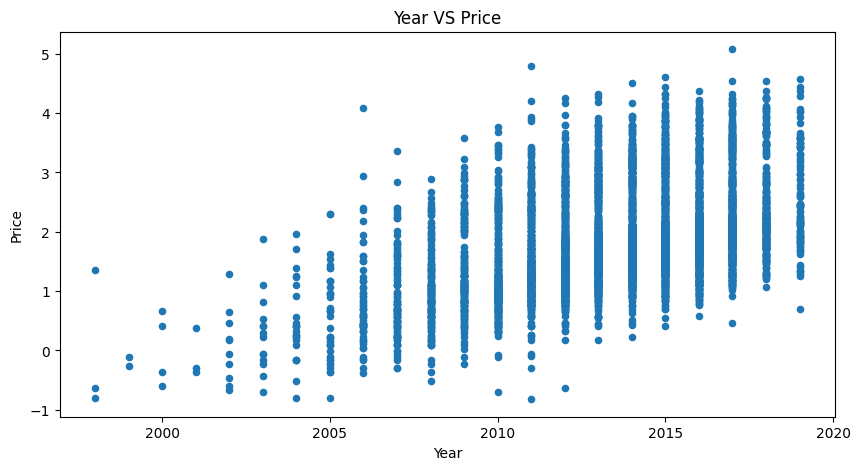

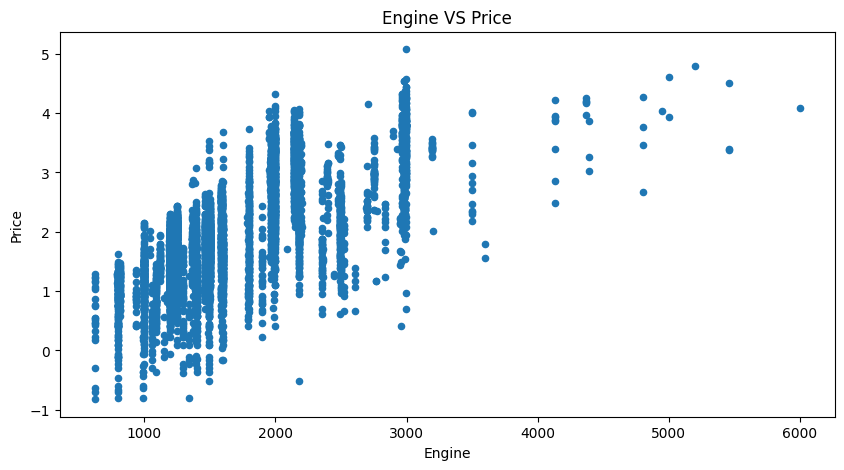

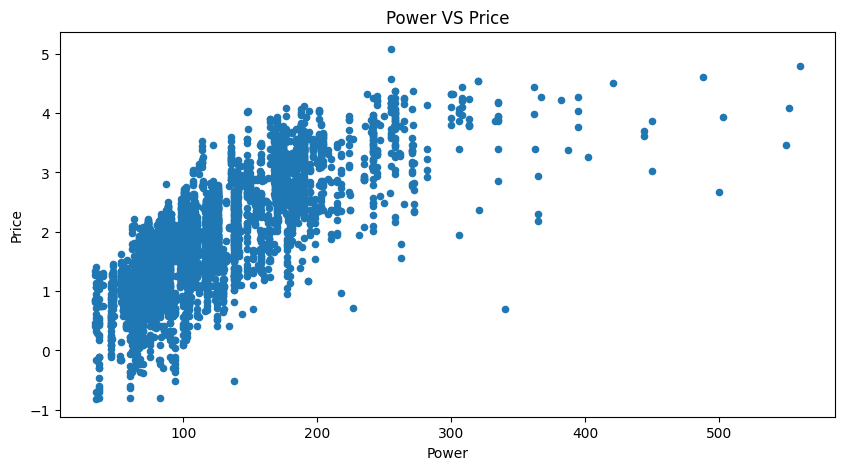

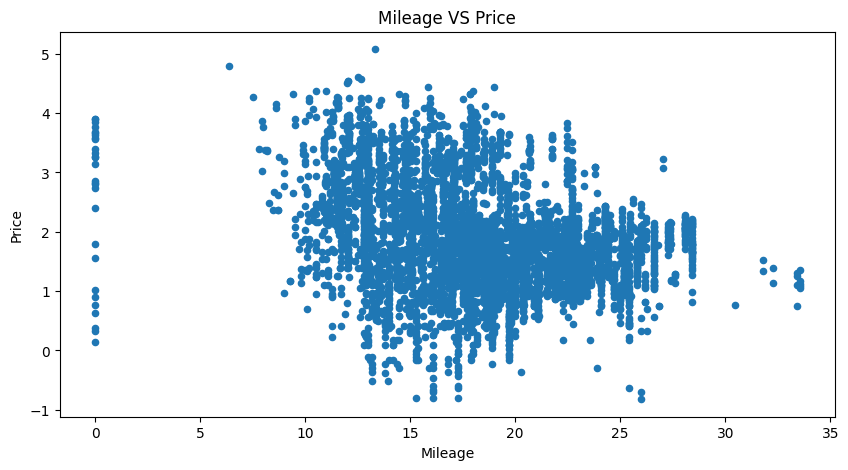

In [98]:
ContinuousCols=['Year', 'Engine', 'Power','Mileage']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    CarData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [99]:
# Calculating correlation matrix
ContinuousCols=[ 'Engine', 'Power','Mileage','Price']

# Creating the correlation matrix
CorrelationData=CarData[ContinuousCols].corr()
CorrelationData

,Engine,Power,Mileage,Price
Engine,1.000000,0.866122,-0.638140,0.689417
Power,0.866122,1.000000,-0.540017,0.770063
Mileage,-0.638140,-0.540017,1.000000,-0.317747
Price,0.689417,0.770063,-0.317747,1.000000


In [100]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Engine    0.689417
Power     0.770063
Price     1.000000
Name: Price, dtype: float64

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots

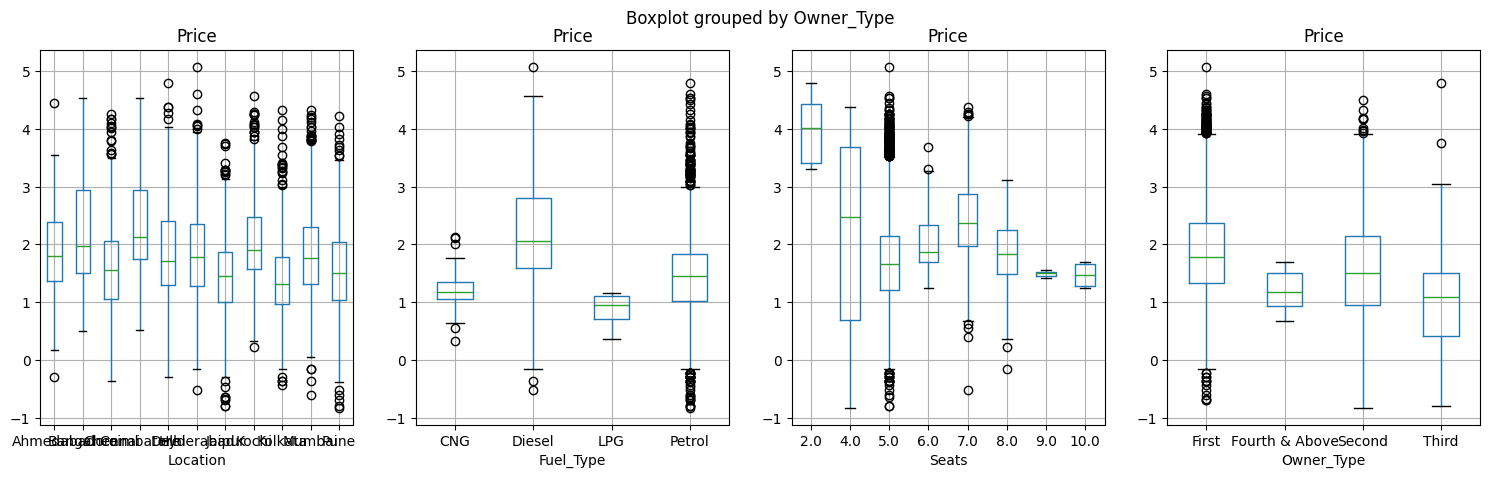

In [101]:
# Box plots for continuous Target Variable "Price" and Categorical predictors
CategoricalColsList=['Location','Fuel_Type','Seats' ,'Owner_Type' ,]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CarData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [102]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [103]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=[ 'Year', 'Location','Fuel_Type','Transmission']
FunctionAnova(inpData=CarData,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Year is correlated with Price | P-Value: 1.9651e-319
Location is correlated with Price | P-Value: 7.056972041495242e-131
Fuel_Type is correlated with Price | P-Value: 6.608159222696187e-264
Transmission is correlated with Price | P-Value: 0.0


['Year', 'Location', 'Fuel_Type', 'Transmission']

In [104]:
SelectedColumns=['Year', 'Engine', 'Power','Mileage']

# Selecting final columns
DataForML=CarData[SelectedColumns]
DataForML.head()

,Year,Engine,Power,Mileage
0,2010,998.0,58.16,26.60
1,2015,1582.0,126.20,19.67
2,2011,1199.0,88.70,18.20
3,2012,1248.0,88.76,20.77
4,2013,1968.0,140.80,15.20


In [105]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [106]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=CarData['Price']

# Printing sample rows
DataForML_Numeric.head()

,Year,Engine,Power,Mileage,Price
0,2010,998.0,58.16,26.60,0.559616
1,2015,1582.0,126.20,19.67,2.525729
2,2011,1199.0,88.70,18.20,1.504077
3,2012,1248.0,88.76,20.77,1.791759
4,2013,1968.0,140.80,15.20,2.875822


In [107]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Year', 'Engine', 'Power', 'Mileage', 'Price'], dtype='object')

In [108]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Year', 'Engine', 'Power', 'Mileage']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [109]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4099, 4)
(4099,)
(1758, 4)
(1758,)


In [111]:
# Checking there is any 0 in Target value
print((CarData['Price'] == 0).sum())


0


## Random Forest Regresoor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.851179049597389

##### Model Validation and Accuracy Calculations ##########
       Year    Engine     Power   Mileage     Price  PredictedPrice
0  0.714286  0.069594  0.060669  0.506261  1.238374             1.0
1  0.809524  0.106624  0.090529  0.641026  1.413423             2.0
2  0.857143  0.116115  0.075694  0.697674  1.252763             2.0
3  0.571429  0.106624  0.087105  0.551580  0.625938             1.0
4  0.714286  0.289356  0.201217  0.450209  2.140066             2.0
Mean Accuracy on test data: 78.15239447926515
Median Accuracy on test data: 83.9776629245172

Accuracy values for 10-fold Cross Validation:
 [87.95737623 80.06361437 94.69290544 76.68601193 86.51757416 85.53080538
 84.08833464 89.51317542 84.11439561 89.38257005]

Final Average Accuracy of the model: 85.85


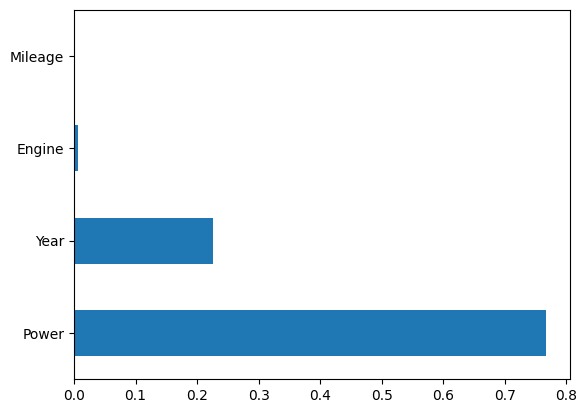

In [112]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Step 21 Model Deployment

In [113]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Year', 'Engine', 'Power', 'Mileage']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(5857, 4)
(5857,)


## Cross Validating Final Accuracy

In [114]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [90.76621349 84.93034242 95.06561487 83.38227282 89.62440005 86.03009785
 87.91776418 91.28236204 89.01821991 91.8060741 ]

Final Average Accuracy of the model: 88.98


## Step 22 Retaining Final model using 100% data

In [115]:
Final_XGB_Model=RegModel.fit(X,y)

## Save the model anywhere

In [116]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: c:\Users\Ahsan\Downloads


## Create a python function

In [117]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Year', 'Engine', 'Power', 'Mileage']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

## Step 25 Calling function fro some new data

In [118]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[4.98,6.575,15.3],[4.98,3.2,10.3]],columns=['Engine', 'Power', 'Mileage'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   Engine  Power  Mileage
0    4.98  6.575     15.3
1    4.98  3.200     10.3


,Prediction
0,1.187207
1,1.873296


## Deploying Function with few parameters

In [119]:

def FunctionGeneratePrediction(inp_Years, inp_Mileage, inp_Engine, inp_Power):
    # Creating a data frame for the model input
    SampleInputData = pd.DataFrame(
        data=[[inp_Years, inp_Mileage, inp_Engine, inp_Power]],
        columns=['Years', 'Mileage', 'Engine', 'Power']
    )

    # Assuming FunctionPredictResult is an existing function that can handle these inputs
    Predictions = FunctionPredictResult(InputData=SampleInputData)

    # Returning the predictions as a JSON string
    return Predictions.to_json()

# Example function call
result = FunctionGeneratePrediction(
    inp_Years=3,
    inp_Mileage=45000,
    inp_Engine=1.6,
    inp_Power=120
)
print(result)


{"Prediction":{"0":2.0385591984}}


## Web development by using Flask

In [120]:
!pip install flask

In [121]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [122]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the parameters from the API call
        Mileage_value = float(request.args.get('Mileage'))
        Years_value = float(request.args.get('Years'))
        Power_value = float(request.args.get('Power'))
        Engine_value = float(request.args.get('Engine'))

        # Calling the function to get predictions using the correct predictor names
        prediction_from_api = FunctionGeneratePrediction(
            inp_Years=Years_value,
            inp_Mileage=Mileage_value,
            inp_Engine=Engine_value,
            inp_Power=Power_value
        )

        return prediction_from_api

    except Exception as e:
        return 'Something is not right!: ' + str(e)




## Starting API engine

In [123]:
from flask import Flask

app = Flask(__name__)

# Define a route as an example
@app.route('/')
def index():
    return "Hello, World!"

# Error handler for any exception
@app.errorhandler(Exception)
def handle_exception(e):
    # you can log the exception here if you want, for example:
    # print(f"An error occurred: {e}")
    return "An internal error occurred", 500

if __name__ == '__main__':
    # Set debug to True for development, change to False in production
    app.run(debug=True, port=8000)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [124]:
'''
Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:9000/prediction_api?LSTAT=4.9&RM=6.5&PTRATIO=15.3
'''

'\nSample URL to call the API\nCopy and paste below URL in the web browser\nhttp://127.0.0.1:9000/prediction_api?LSTAT=4.9&RM=6.5&PTRATIO=15.3\n'

In [125]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class CarPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Car Price Prediction')
        self.data = pd.read_csv(r'C:\Users\Ahsan\OneDrive\Desktop\Assignement 9\CarData.csv')

        # Apply data cleaning
        columns_to_clean = ['Mileage', 'Power', 'Engine']
        for column in columns_to_clean:
            self.data[column] = self.data[column].apply(clean_numeric)

        # Handle missing data
        self.data.dropna(inplace=True)  # or fill as needed

        self.sliders = []

        # Prepare data for model
        self.X = self.data[['Year', 'Mileage', 'Power', 'Engine']].values
        self.y = self.data['Price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()


    def create_widgets(self):
        # Using the feature names directly from the dataframe
        feature_names = ['Year', 'Mileage', 'Power', 'Engine']
        for i, column in enumerate(feature_names):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(feature_names), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted car price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = CarPricePredictionApp(root)
    root.mainloop()


Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could not convert string to float: 'null'
Error converting null bhp: could n